In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
np.random.seed(42)

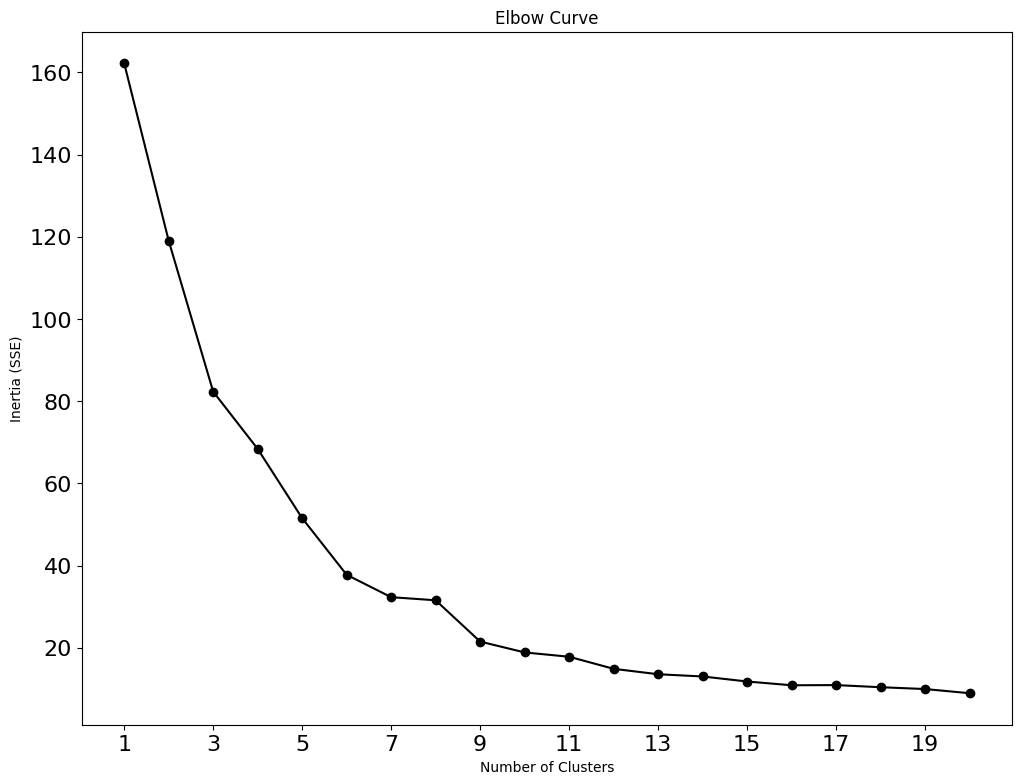

Cluster Summary:
          Graphite Powder  Graphene   Carbon Quantum Dots   \
Cluster                                                     
0                  0.000  0.303100               0.072900   
1                  0.000  0.000000               0.000000   
2                  0.000  0.000000               0.000000   
3                  0.000  0.005385               0.000000   
4                  0.000  0.823075               0.005128   
5                  0.925  0.000000               0.000000   
6                  0.000  0.000000               0.000000   
7                  0.000  0.000000               0.000000   

         Single- Walled Carbon nanotube  Multi- Walled Carbon nanotube  \
Cluster                                                                  
0                              0.000000                       0.009000   
1                              0.000000                       0.000000   
2                              0.000000                       0.000000   
3

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data
AA="C:/Users/ganes/onedrive/Desktop/AI/DMFC/PCAOH.xlsx"
df=pd.read_excel(AA)
X = pd.read_excel(AA, usecols='A:AC') 


# Step 3: Determine the optimal number of clusters using the elbow method
sse = []
for E in range(1, 21):
    kmeans = KMeans(n_clusters=E)
    kmeans.fit(X)
    sse.append([E, kmeans.inertia_])

# Plot the elbow curve
plt.figure(figsize=(12, 9))
plt.xticks(range(1, 21, 2))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.tick_params(labelsize=16)
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], "k", marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Curve')
plt.show()

# Step 4: Apply K-means clustering with the chosen number of clusters (e.g., 5)
n_clusters = 8  # Set this to the number of clusters determined from the elbow curve
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Add cluster labels to the DataFrame 'df'
df_k = pd.read_excel(AA, usecols='A:AC')  # Load full dataset
df_k['Cluster'] = kmeans.fit_predict(X)

# Group by the 'Cluster' column in 'df'
cluster_summary = df_k.groupby('Cluster').mean()
print("Cluster Summary:\n", cluster_summary)


In [3]:
import pandas as pd

# Create a dictionary with the cluster summary data
data = {
    'Graphite Powder': [0.000, 0.000, 0.000, 0.000, 0.000, 0.925, 0.000, 0.000],
    'Graphene': [0.303100, 0.000000, 0.000000, 0.005385, 0.823075, 0.000000, 0.000000, 0.000000],
    'Carbon Quantum Dots': [0.072900, 0.000000, 0.000000, 0.000000, 0.005128, 0.000000, 0.000000, 0.000000],
    'Single Wall Carbon nanotube': [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.948811, 0.000000],
    'Multi Wall Carbon nanotube': [0.009000, 0.000000, 0.000000, 0.686282, 0.000000, 0.000000, 0.000000, 0.000000],
    'Carbon Nanofiber': [0.002600, 0.000000, 0.512174, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Mesoporous Carbon': [0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.687333],
    'Carbon Black': [0.020400, 0.733804, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Nitrogen': [0.018800, 0.002391, 0.000000, 0.003590, 0.014412, 0.000000, 0.000000, 0.015333],
    'Sulphur': [0.000000, 0.000761, 0.000000, 0.019872, 0.002047, 0.000000, 0.000000, 0.001333],
    'Fe': [0.000000, 0.000000, 0.000000, 0.001154, 0.008088, 0.000000, 0.000000, 0.000000],
    'Ir': [0.000000, 0.000761, 0.000000, 0.006026, 0.000000, 0.000000, 0.000000, 0.000000],
    'Ni': [0.001600, 0.000000, 0.000000, 0.001282, 0.000000, 0.000000, 0.000000, 0.000000],
    'Pd': [0.031600, 0.000243, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Pt': [0.336800, 0.168409, 0.186087, 0.187410, 0.116618, 0.050000, 0.040189, 0.204000],
    'Ru': [0.006800, 0.018859, 0.059130, 0.016026, 0.012941, 0.025000, 0.011000, 0.026000],
    'SnO2': [0.000000, 0.003913, 0.000000, 0.004615, 0.000044, 0.000000, 0.000000, 0.000000],
    'TiO2': [0.096800, 0.016087, 0.119130, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000],
    'Zn': [0.00000, 0.00000, 0.00000, 0.00041, 0.00000, 0.00000, 0.00000, 0.00000],
    'Heteropolyacid': [0.000000, 0.000000, 0.000000, 0.004615, 0.000000, 0.000000, 0.000000, 0.000000]
}

# Convert the dictionary to a pandas DataFrame
df_summary = pd.DataFrame(data)

# Set the 'Cluster' column as the index
df_summary.index = [0, 1, 2, 3, 4, 5, 6, 7]  # Assuming 8 clusters

# Export the DataFrame to an Excel file
df_summary.to_excel('Cluster_Summary.xlsx', sheet_name='Cluster Summary')

print("Cluster summary exported successfully to 'Cluster_Summary.xlsx'")


Cluster summary exported successfully to 'Cluster_Summary.xlsx'


In [ ]:
#The cluster summary provides the mean values of different features (materials or elements) across 8 clusters. Here's a brief interpretation:

Cluster 0: High concentrations of Pt (0.34), Pd (0.03), and Zn (0.10), with a moderate presence of GE (0.30).
Cluster 1: Dominated by CB (0.73) and trace amounts of Pt (0.17), Ru (0.02), and Pd (0.00).
Cluster 2: Mostly CNF (0.51) with moderate amounts of Pt (0.19) and TiO2 (0.12).
Cluster 3: Primarily MWNT (0.69) and some Pt (0.19), Pd (0.00).
Cluster 4: High concentration of GE (0.82).
Cluster 5: Almost exclusively GP (0.93).
Cluster 6: Dominated by SWNT (0.95).
Cluster 7: High concentration of MC (0.69) and some Pt (0.20).
Each cluster represents unique groupings of materials, which helps in identifying different types of patterns based on the composition.

This elbow curve shows the sum of squared errors (inertia) as a function of the number of clusters in a K-means clustering algorithm.

Key Interpretation:

The curve initially shows a steep drop in SSE as the number of clusters increases, indicating better clustering (more variance explained).
Around 5-8 clusters, the curve begins to flatten, which suggests diminishing returns in reducing SSE with additional clusters.
The "elbow" point typically indicates the optimal number of clusters, as adding more clusters beyond this point does not significantly improve the fit.
Based on this plot, 5 to 8 clusters appear to be a good choice for the K-means clustering solution.

The image shows a t-SNE (t-distributed Stochastic Neighbor Embedding) plot used for visualizing high-dimensional data, where data points are grouped into clusters. The plot contains multiple clusters represented by colored dots, with the color corresponding to different cluster labels (0 to 7) as indicated by the color bar.

Key interpretations:

Clusters: Data points have been grouped into distinct clusters, indicating underlying patterns or groupings in the data.
Separation: Some clusters (like the green cluster near the top) are well-separated, indicating that these groups are highly distinct from others.
Overlap: A few clusters, especially those toward the center and lower right, seem closer or overlapping slightly, suggesting these groups may share similarities or have less distinct boundaries.
Dimensions: The x- and y-axes represent two t-SNE components, which are lower-dimensional representations of the data, helping visualize how the points relate to each other in the original, higher-dimensional space.
In summary, the data appears to form well-defined clusters, with some more distinct and others slightly closer together, indicating both clear and subtle patterns within the dataset.The color in the t-SNE plot represents different cluster labels. Each distinct color corresponds to a specific cluster or group of data points, as indicated by the color bar on the right, which ranges from 0 to 7. These cluster labels likely come from a clustering algorithm (e.g., k-means, DBSCAN) applied to the data, grouping points with similar features into the same cluster.

In essence, the color coding helps visually distinguish between different clusters and shows which data points belong to the same group.#

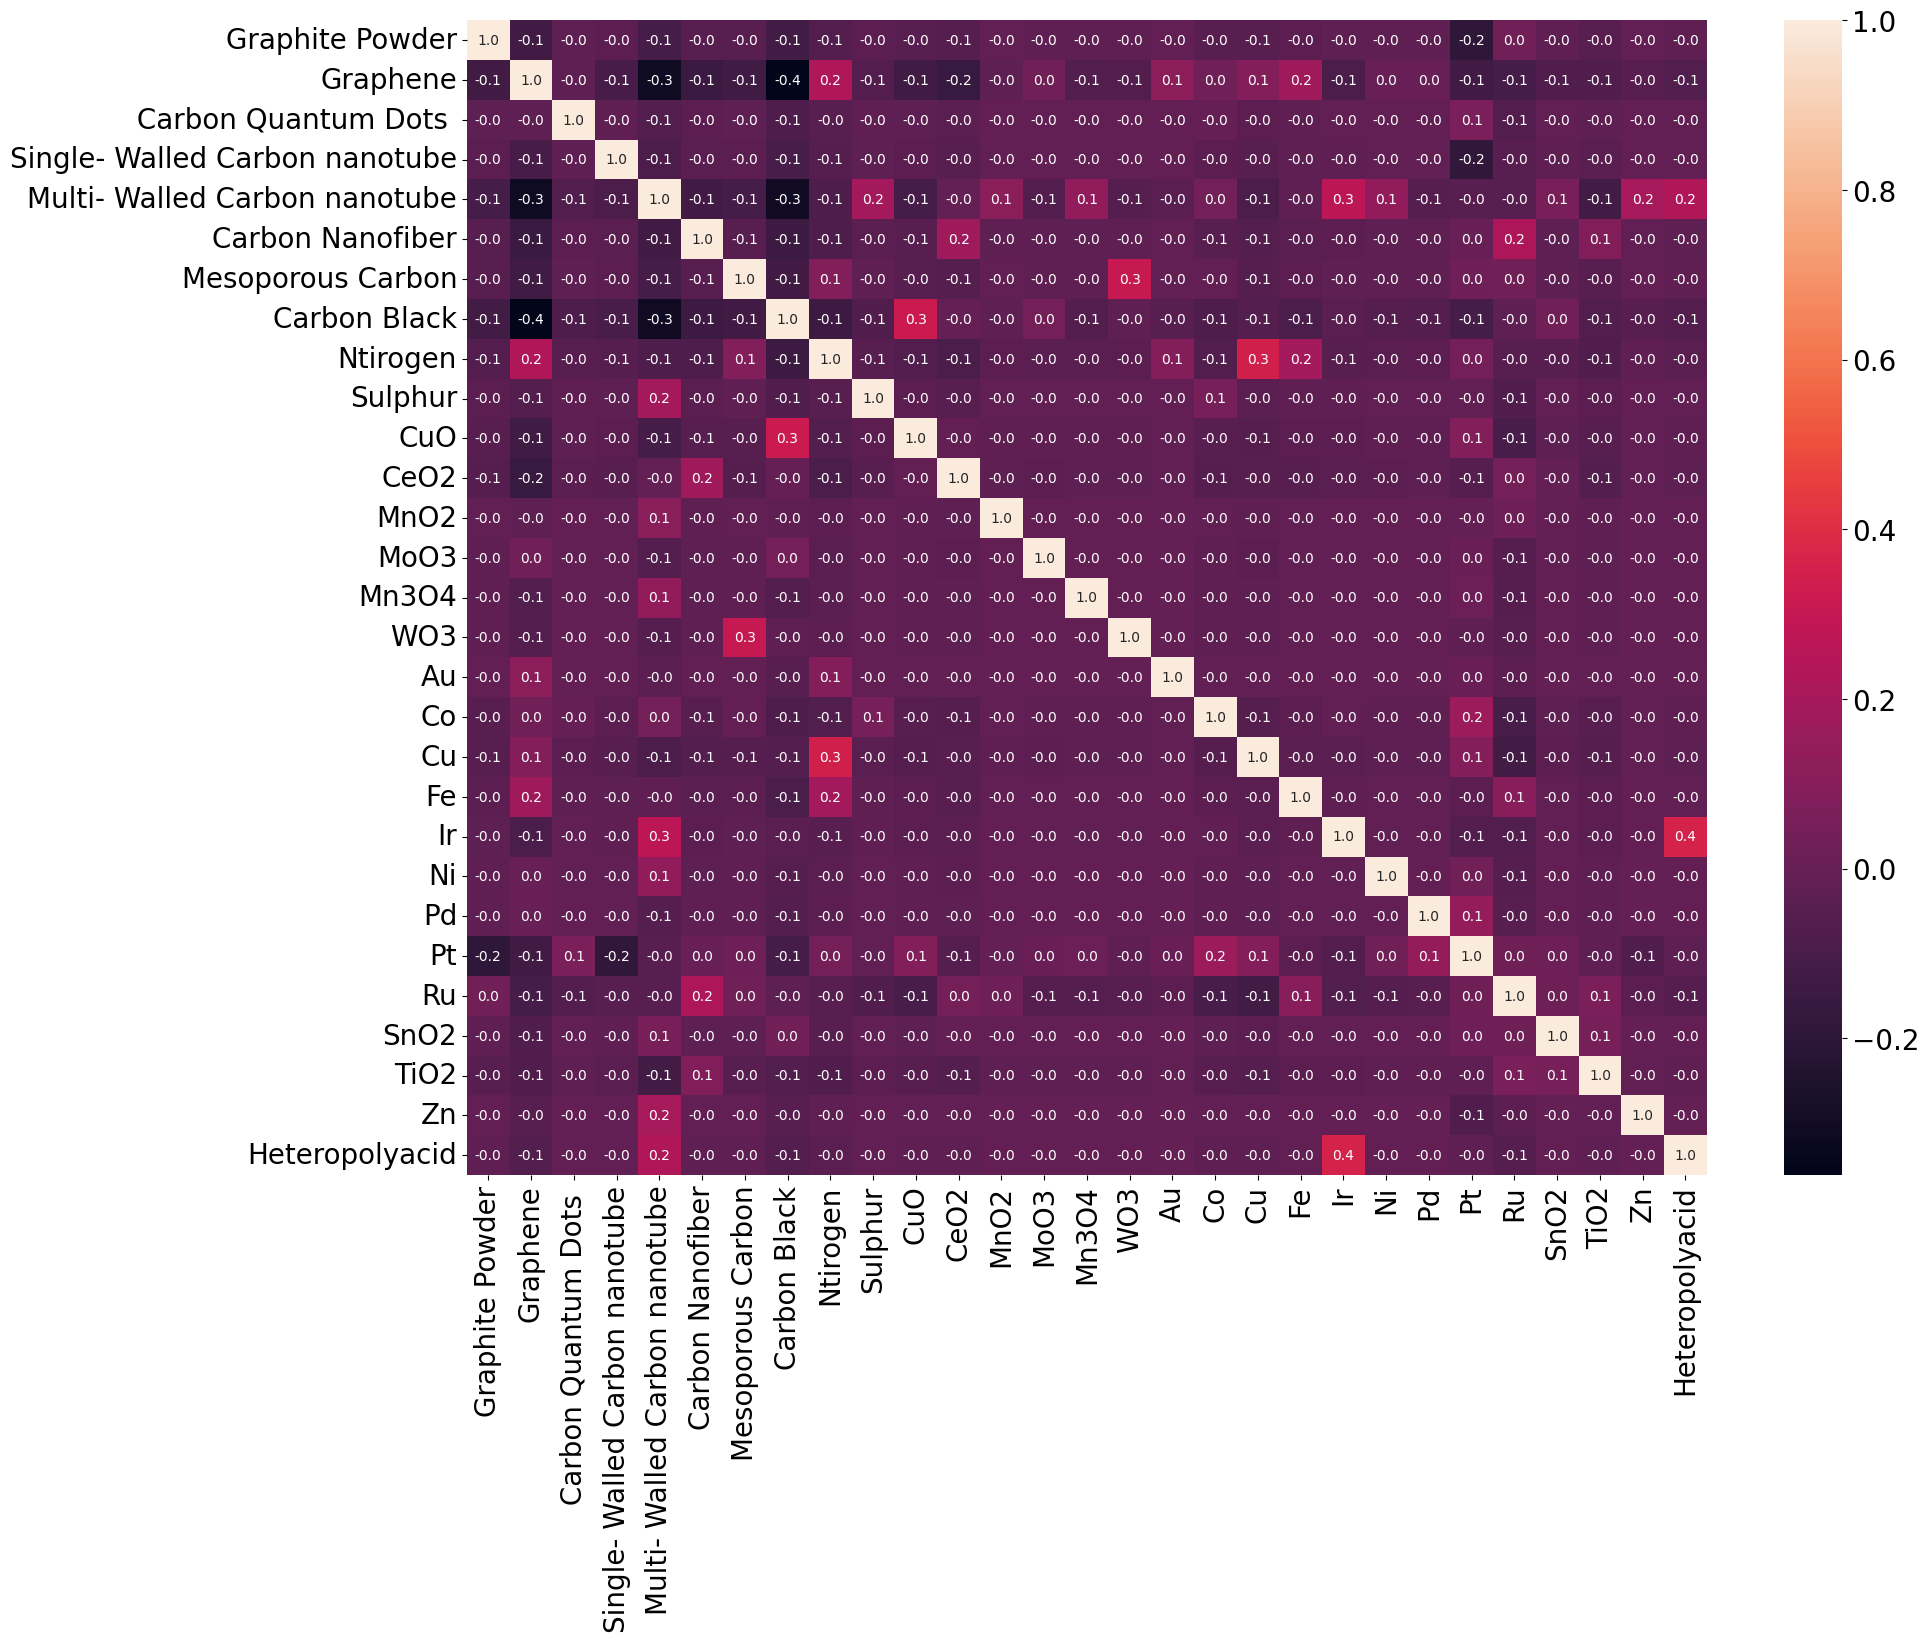

In [4]:
corr=X.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr,annot=True, annot_kws={'size': 10}, fmt=".1f")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)

C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


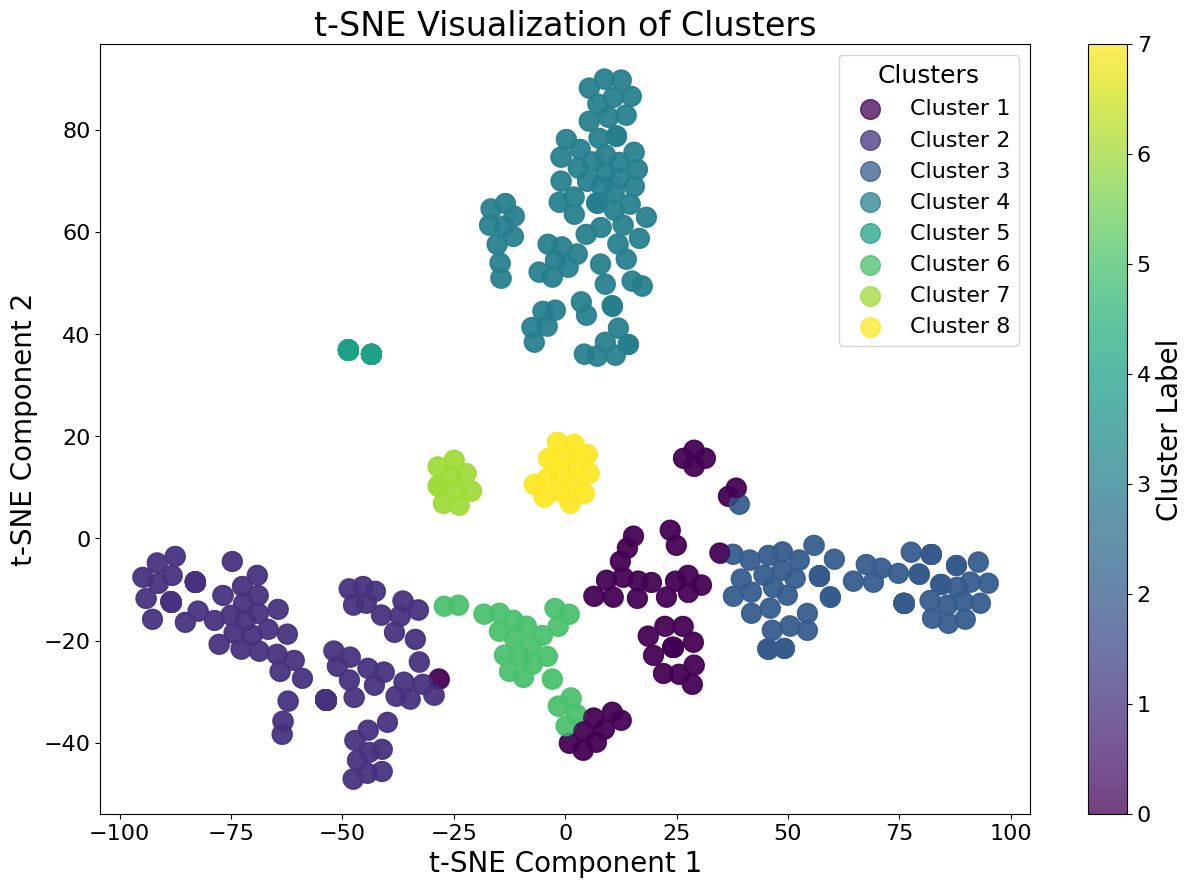

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np

# Assuming X is your data and you want to perform KMeans clustering
cluster = KMeans(n_clusters=8, random_state=1)
cluster.fit(X)
cluster_predictions = cluster.predict(X)

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=1, n_iter=1000, perplexity=30, init="pca", learning_rate="auto")
tsne_EP = tsne.fit_transform(X)

# Set up the figure
plt.figure(figsize=(15, 10))

# Define a color map for the clusters
colors = plt.cm.viridis(np.linspace(0, 1, 8))

# Plot t-SNE result and label each cluster with a different color
for cluster_num in range(8):
    idx = cluster_predictions == cluster_num
    plt.scatter(tsne_EP[idx, 0], tsne_EP[idx, 1], color=colors[cluster_num], s=200, alpha=0.75, label=f'Cluster {cluster_num + 1}')

# Add color bar on the side
scatter = plt.scatter(tsne_EP[:, 0], tsne_EP[:, 1], c=cluster_predictions, s=200, alpha=0.75, cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label', fontsize=20)  # Label for the color bar
cbar.ax.tick_params(labelsize=16)  # Adjust color bar tick size

# Improve the overall appearance of the plot
plt.title("t-SNE Visualization of Clusters", fontsize=24)
plt.xlabel("t-SNE Component 1", fontsize=20)
plt.ylabel("t-SNE Component 2", fontsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

# Add legend
plt.legend(fontsize=16, title="Clusters", title_fontsize=18)

# Show the plot
plt.show()
